In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
drinks = pd.read_csv('C:/Users/User/Desktop/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


# 1. 데이터에 대한 전체적인 살펴보기

In [20]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [7]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [9]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [10]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

# 2. 전처리

In [11]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']

In [13]:
corr = drinks[cols].corr(method='pearson') #상관지수구하기, 피어슨상관계수
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [ ]:
# 맥주를 마시는 국가와 스프라이트를 마시는 국가간의 상관관계 : 어느정도 양의 관계에 있음(비례)
# 와인을 마시는 국가와 스프라이트를 마시는 국가간의 상관관계 : 상관관계가 약함(비례) 
# 맥주를 마시는 국가와 와인을 마시는 국가간의 상관관계 : 어느정도 양의 관계에 있음(비례)

In [14]:
# 스프라이트는 와인보다는 맥주와 좀 더 상관이 있다.

In [15]:
# 항목간의 상관 관계를 알 수 있는 방법 3가지
# 1. corr함수를 이용(피어슨상관계수)
# 2. heatmap그래프
# 3. pairplot

In [16]:
import seaborn as sns

In [17]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

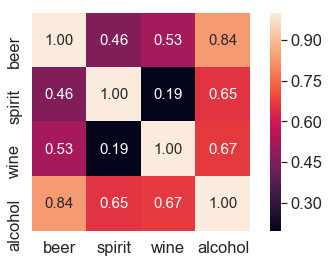

In [18]:
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

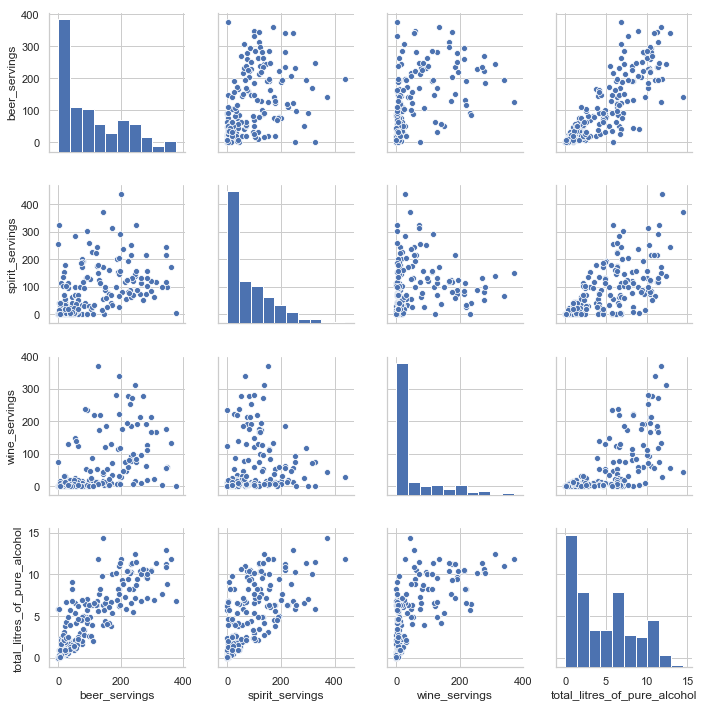

In [21]:
# 시각화 라이브러리를 이용한 feature 간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

In [29]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [30]:
# NA(Not Available): 결측치(+이상치)를 모두 NA처리를 해준다.
# NA로 모두 변경한 것을 일괄처리할 수 있다.

In [33]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [35]:
drinks['continent'].value_counts() #value_counts(): 그룹별 count

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [36]:
con_val_count = drinks['continent'].value_counts()
type(con_val_count)

pandas.core.series.Series

In [37]:
# Series는 index와 values의 결합

In [40]:
con_val_count.index

Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')

In [44]:
pie_labels = con_val_count.index

In [45]:
con_val_count.values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [46]:
pie_values = con_val_count.values

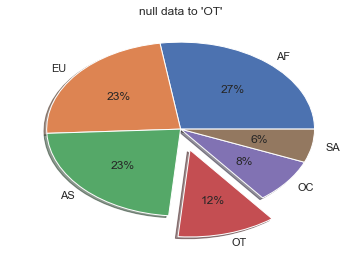

In [47]:
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(pie_values, explode=explode, labels=pie_labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

# 3.기술(설명)적 통계: 통계를 통해서 데이터들을 자세하게 설명해보자

In [50]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [55]:
result2 = drinks.groupby('continent').spirit_servings.mean()
result2

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [56]:
type(result)

pandas.core.frame.DataFrame

In [57]:
type(result2)

pandas.core.series.Series

In [58]:
result3 = drinks.groupby('continent')['spirit_servings'].mean()
result3

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [59]:
type(result3)

pandas.core.series.Series

In [61]:
result4 = result3[result3 >= 100]
result4

continent
EU    132.555556
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [62]:
result4.idxmax() #result4의 values중에서 제일 max값의 인덱스를 리턴

'OT'

In [ ]:
# 맥주 총(sum) 소비량이 제일 높은 대륙은?
# 와인 최대(max) 소비량이 제일 높은 대륙은?
# 맥주 평균(mean) 소비량이 제일 높은 대륙은?

In [66]:
result5 = drinks.groupby('continent')['beer_servings'].sum()
result5.idxmax()

'EU'

In [68]:
result6 = drinks.groupby('continent')['wine_servings'].max()
result6.idxmax()

'EU'

In [70]:
result7 = drinks.groupby('continent')['beer_servings'].mean()
result7.idxmax()

'EU'

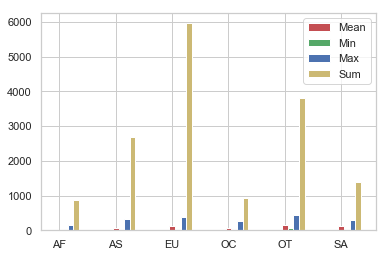

In [78]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index) # 대륙의 각 인덱스를 가져오기 위한 선언.
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [85]:
result_wine = drinks.groupby('continent').wine_servings.agg(['mean', 'min', 'max', 'sum'])
result_wine

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
OT,24.521739,1,100,564
SA,62.416667,1,221,749


In [87]:
result_wine2 = drinks.groupby('continent').wine_servings.mean()
result_wine2

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

In [88]:
result_wine2 = drinks.groupby('continent').wine_servings.min()
result_wine2

continent
AF    0
AS    0
EU    0
OC    0
OT    1
SA    1
Name: wine_servings, dtype: int64

In [89]:
result_wine3 = drinks.groupby('continent').wine_servings.max()
result_wine3

continent
AF    233
AS    123
EU    370
OC    212
OT    100
SA    221
Name: wine_servings, dtype: int64

In [90]:
result_wine4 = drinks.groupby('continent').wine_servings.sum()
result_wine4

continent
AF     862
AS     399
EU    6400
OC     570
OT     564
SA     749
Name: wine_servings, dtype: int64

In [93]:
# 나라별 전체알콜소비량 대비 맥주소비량
total = drinks.total_litres_of_pure_alcohol.mean()
total_beer = drinks.beer_servings.mean()
answer_1 = total_beer / total
answer_1

22.5054920913884

In [94]:
total

4.717098445595855

In [96]:
total_beer

106.16062176165804

In [125]:
# 전체 평균보다 많은 와인을 마시는 나라
total_wine = drinks.wine_servings.mean()
country_wine = drinks.groupby('country')['wine_servings'].mean()
country_over_wine = country_wine[country_wine >= total_wine]
country_over_wine

country
Albania                 54
Andorra                312
Argentina              221
Australia              212
Austria                191
Bahamas                 51
Belgium                212
Bulgaria                94
Canada                 100
Chile                  172
Cook Islands            74
Croatia                254
Cyprus                 113
Czech Republic         134
Denmark                278
Equatorial Guinea      233
Estonia                 59
Finland                 97
France                 370
Gabon                   59
Georgia                149
Germany                175
Greece                 218
Hungary                185
Iceland                 78
Ireland                165
Italy                  237
Laos                   123
Latvia                  62
Lithuania               56
Luxembourg             271
Macedonia               86
Malta                  120
Montenegro             128
Netherlands            190
New Zealand            175
Norway              

In [127]:
# 전체 평균보다 많은 와인을 마시는 나라의 수
len(country_over_wine)

55

In [128]:
# 전체 평균보다 많은 와인을 마시는 나라들의 평균
country_over_wine.mean()

154.27272727272728

In [137]:
country_beer = drinks.groupby('country')['beer_servings'].mean()
country_beer.nlargest(15)

country
Namibia           376
Czech Republic    361
Gabon             347
Germany           346
Lithuania         343
Poland            343
Venezuela         333
Ireland           313
Palau             306
Romania           297
Belgium           295
Panama            285
Spain             284
Serbia            283
Latvia            281
Name: beer_servings, dtype: int64

In [149]:
drinks[drinks['country'] == 'South Korea'].index

Int64Index([138], dtype='int64')

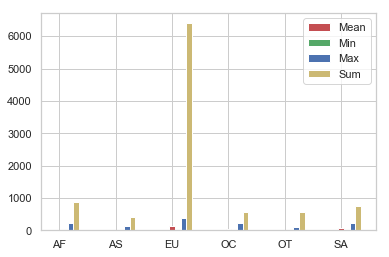

In [80]:
# 분석 결과에 대한 시각화.
result2 = drinks.groupby('continent').wine_servings.agg(['mean', 'min', 'max', 'sum'])

# 대륙별 wine_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result2.index) # 대륙의 각 인덱스를 가져오기 위한 선언.
means = result2['mean'].tolist()
mins = result2['min'].tolist()
maxs = result2['max'].tolist()
sums = result2['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [83]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

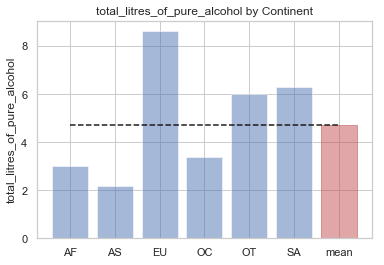

In [152]:
# 대륙별 total_litres_of_pure_alcohol을 시각화.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [153]:
!pip install scipy

distutils: d:\anaconda3\Include\UNKNOWN
sysconfig: d:\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: d:\anaconda3\Include\UNKNOWN
sysconfig: d:\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [154]:
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

In [155]:
from scipy import stats

In [156]:
stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [157]:
# africa와 europe간의 평균의 차이가 의미가 있다. 대립가설이 채택
# 대립가설: 아프리카, 유랍간 평균의 차이가 있다.
# 영가설: 평균의 차이가 없다.

In [158]:
import scipy

In [159]:
scipy.__version__

'1.1.0'